使用我们上节课的数据，然后我们使用逻辑回归算法中的decisin_score来进行调节

In [11]:
# %load ./Scripts/confusion_matrix.py
import numpy as np

# 实现我们的TP
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 0))

def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

def confusion_matrix(y_true, y_predict):
    return np.array([
        [TN(y_true, y_predict), FP(y_true, y_predict)],
        [FN(y_true, y_predict), TP(y_true, y_predict)]
    ])

def precision(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    return tp / (tp + fp)
    
def recall(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    return tp / (tp + fn)

In [12]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_x,train_y)
y_predict = log_reg.predict(test_x)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
confusion_matrix(test_y, y_predict)

array([[12,  1],
       [ 0, 17]])

In [14]:
decision_scores = log_reg.decision_function(test_x)
decision_scores[:10]

array([ 2.28059917,  3.63121496,  2.4305262 ,  2.25909013, -1.34972166,
       -1.67846653,  1.75890919,  1.31587361, -2.70771922, -2.95780969])

In [15]:
np.min(decision_scores)

-2.9578096862749015

In [16]:
np.max(decision_scores)

4.038614232171044

In [17]:
#我们可以通过设置decision_score的值来得到，精准率和召回率的平衡，或着我们更侧重于哪个值
# 可以进行相适应的调整
y_predict2 = np.array(decision_scores > 2)

In [18]:
confusion_matrix(test_y, y_predict2)

array([[13,  0],
       [ 8,  9]])

P-R曲线

In [19]:
precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision(test_y, y_predict))
    recalls.append(recall(test_y, y_predict))

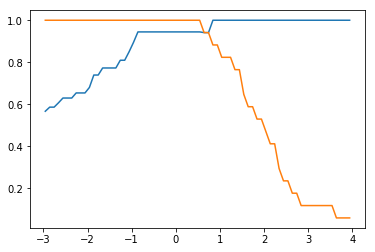

In [20]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

END